!pip install opencv-python

Issue with `pip install cv2`
https://stackoverflow.com/questions/51853018/how-do-i-install-opencv-using-pip

TODO

- turn grid off in chart
- compare RSI chart only (remove volumn and candlestick)

In [1]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [12]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    # convert img to grayscale for comparison
    # need to crop two images to ensure the same shape
    ymin,ymax, xmin,xmax = 5, 900, 5, 1470
    imgA_gray = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)[ymin:ymax, xmin:xmax]
    imgB_gray = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)[ymin:ymax, xmin:xmax]
    m = mse(imgA_gray, imgB_gray)
    s = ssim(imgA_gray, imgB_gray)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.4f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()

In [13]:
img_list = ["ADM", "NVDA", "CAH"]

In [14]:
images = []
for img in img_list:
    script_s = f"""{img.lower()} = cv2.imread('images/{img}-00.png')"""
    print(script_s)
#     eval(script_s)
    
    script_s = f"""images.append(["{img}", {img.lower()}])"""
    print(script_s)
#     eval(script_s)

adm = cv2.imread('images/ADM-00.png')
images.append(["ADM", adm])
nvda = cv2.imread('images/NVDA-00.png')
images.append(["NVDA", nvda])
cah = cv2.imread('images/CAH-00.png')
images.append(["CAH", cah])


In [15]:
# cut-paste above script here
adm = cv2.imread('images/ADM-00.png')
images.append(["ADM", adm])
nvda = cv2.imread('images/NVDA-00.png')
images.append(["NVDA", nvda])
cah = cv2.imread('images/CAH-00.png')
images.append(["CAH", cah])

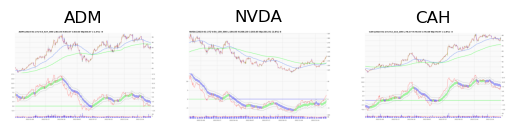

In [16]:
# initialize the figure
fig = plt.figure("Images")

# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()

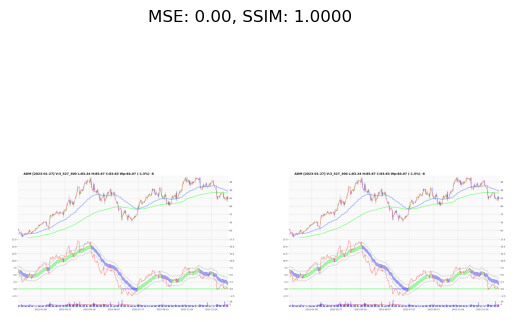

In [17]:
# compare the images
compare_images(adm, adm, "ADM vs. ADM")

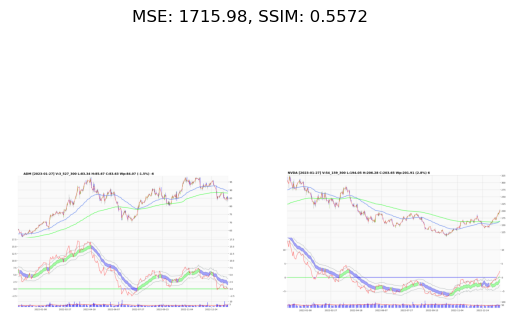

In [18]:
compare_images(adm, nvda, "ADM vs. NVDA")

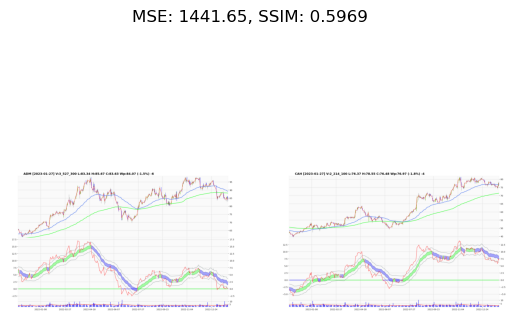

In [19]:
compare_images(adm, cah, "ADM vs. CAH")

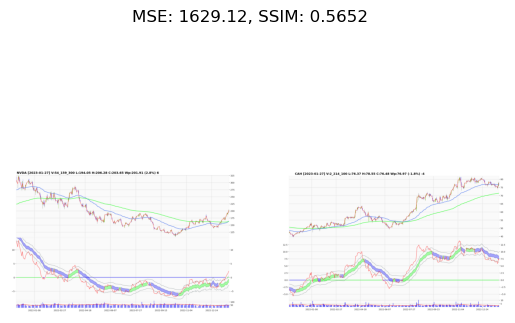

In [20]:
compare_images(nvda, cah, "NVDA vs. CAH")